In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
file_path = "buoy44011_7_2024.txt"

col_names = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]
data = pd.read_csv(file_path, delim_whitespace=True, names=col_names, comment='#')

In [11]:
data = data[(data["DD"] >= 5) & (data["DD"] <= 12)]

In [12]:

data['datetime'] = pd.to_datetime(data[['YY', 'MM', 'DD', 'hh', 'mm']].rename(columns={'YY': 'year', 'MM': 'month', 'DD': 'day', 'hh': 'hour', 'mm': 'minute'}))

In [13]:
data.replace(999.0, np.nan, inplace=True)

In [15]:
data['datetime']

576    2024-07-05 00:00:00
577    2024-07-05 00:10:00
578    2024-07-05 00:20:00
579    2024-07-05 00:30:00
580    2024-07-05 00:40:00
               ...        
1723   2024-07-12 23:10:00
1724   2024-07-12 23:20:00
1725   2024-07-12 23:30:00
1726   2024-07-12 23:40:00
1727   2024-07-12 23:50:00
Name: datetime, Length: 1152, dtype: datetime64[ns]

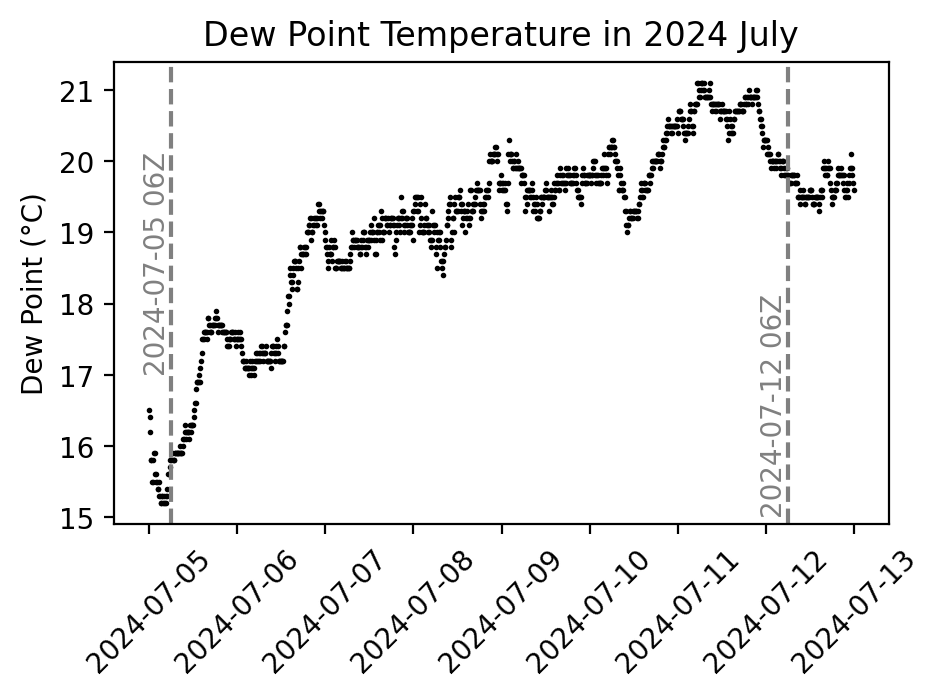

In [27]:
# Plot the DEWP variable
date_1 = pd.to_datetime('2024-07-05 06:00:00')
date_2 = pd.to_datetime('2024-07-12 06:00:00')

fig = plt.figure(figsize=(5, 3))
plt.scatter(data['datetime'], data['DEWP'], c='black', s=1)

plt.axvline(x=date_1, color='grey', linestyle='--')
plt.axvline(x=date_2, color='grey', linestyle='--')

plt.text(date_1, 17, '2024-07-05 06Z', color='grey', ha='right', va='bottom', fontsize=10, rotation=90)
plt.text(date_2, 15, '2024-07-12 06Z', color='grey', ha='right', va='bottom', fontsize=10, rotation=90)

plt.ylabel('Dew Point (°C)')
plt.title('Dew Point Temperature in 2024 July')
plt.xticks(rotation=45)
fig.set_dpi(200)
plt.show()